# Contents

01. Importing Libraries
02. Importing Data
03. Creating a User Defined Function
04. Creating If statements with the loc() function
05. If Statements with For Loops
06. Creating Busiest Days Column
07. Creating Busiest Period of Day Column

# 01. Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as plt
import scipy

# 02. Import Data

In [2]:
# creat file path
path = r'C:\Users\Campa\Data Projects\Instacart Basket Project'

In [3]:
# import orders_products_merged.pkl
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_merged.pkl'))

In [6]:
# creating subset 
df = df_ords_prods_merged[:1000000]

In [7]:
df.shape

(1000000, 15)

In [8]:
df.head()

,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0


# 03. Creating a User Defined Function

In [9]:
# define a function for creating price categories
def price_label(row):
    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    elif row['prices'] > 15:
        return 'High-range product'
    else: return 'Not enough data'

In [18]:
# Apply the function
df_ords_prods_merged['price_range'] = df.apply(price_label, axis=1)

In [19]:
# checking product price range counts
df_ords_prods_merged['price_range'].value_counts()

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [20]:
# checking max single product price
df_ords_prods_merged['prices'].max()

99999.0

# 04. Creating If- Statements with the loc() Function

In [24]:
# creating conditions
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 15, 'price_range'] = 'High-range product'

In [25]:
df_ords_prods_merged.loc[(df_ords_prods_merged['prices'] <= 15) & (df_ords_prods_merged['prices'] > 5), 'price_range'] = 'Mid-range product'

In [26]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] <= 5, 'price_range'] = 'Low-range product'

In [27]:
df['price_range'].value_counts()

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [28]:
#performing price range counts on full data set
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 15, 'price_range'] = 'High-Range Product'

In [29]:
df_ords_prods_merged.loc[(df_ords_prods_merged['prices'] <= 15) & (df_ords_prods_merged['prices'] > 5), 'price_range'] = 'Mid-Range Product'

In [30]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] <= 5, 'price_range'] = 'Low-range product'

In [31]:
df_ords_prods_merged['price_range'].value_counts()

Mid-Range Product     21860860
Low-range product     10126321
High-Range Product      417678
Name: price_range, dtype: int64

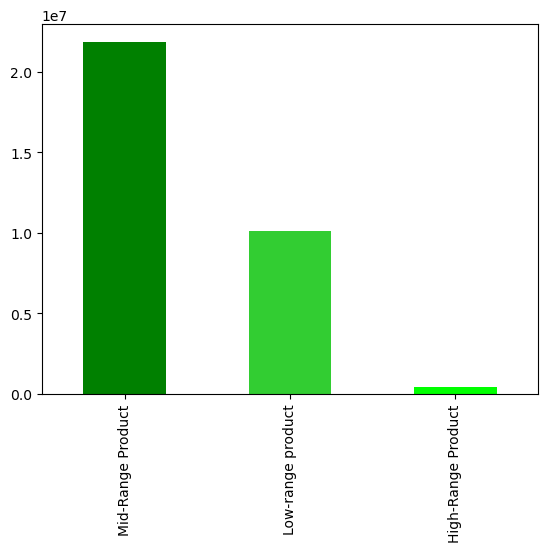

In [35]:
price_bar = df_ords_prods_merged['price_range'].value_counts().plot.bar(color = ['green', 'limegreen', 'lime'])

In [36]:
price_bar.figure.savefig((os.path.join(path, '04 Analysis', 'Visualizations', 'price_bar.png')), bbox_inches = 'tight')

# 05. If-Statements with For-Loops

In [28]:
# order counts for each day od the week
df_ords_prods_merged['order_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [31]:
# create loop to derive business level for each day

result = []

for value in df_ords_prods_merged['order_day_of_week']:
    if value == 0:
        result.append("Busiest Day")
    elif value == 4:
        result.append("Leasy Busy")
    else:
        result.append("Regularly Busy")

In [32]:
result

['Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Leasy Busy',
 'Leasy Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Leasy Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Leasy Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Leasy Busy',
 'Leasy Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Regularly Busy',
 'Leasy Busy',
 'Regularly Busy',
 'Busiest Day',
 'Regularly Busy',
 'Reg

In [39]:
# creating column for busiest day variable
df_ords_prods_merged['busiest_day'] = result

In [42]:
#checking busiest_day value counts
df_ords_prods_merged['busiest_day'].value_counts()

Regularly Busy    22416875
Busiest Day        6204182
Leasy Busy         3783802
Name: busiest_day, dtype: int64

# 06. Creating Busiest Days column

In [71]:
# Create loop to creat Busiest Days Column

result = []

for value in df_ords_prods_merged['order_day_of_week']:
    if value in [0,1]:
        result.append("Busiest Days")
    elif value in [3,4]:
        result.append("Leasy Busy")
    else:
        result.append("Regularly Busy")

In [50]:
#dropping busiest_day column
df_ords_prods_merged = df_ords_prods_merged.drop(columns = ['busiest_day', 'busiest day'])

In [72]:
# creat column for Busiest Days variable
df_ords_prods_merged['Busiest Days'] = result

In [73]:
df_ords_prods_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,Busiest Days
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,Mid-Range Product,Regularly Busy
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,Mid-Range Product,Least Busy
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,Mid-Range Product,Least Busy
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,Mid-Range Product,Least Busy
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,Mid-Range Product,Least Busy


In [74]:
df_ords_prods_merged['Busiest Days'].value_counts()

Regularly Busy    12916111
Busiest Day       11864412
Least Busy         7624336
Name: Busiest Days, dtype: int64

# 07. Creating Busiest Period of Day Column

In [75]:
# checking busiest hours of day
df_ords_prods_merged['order_hour_of_day'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [76]:
# Creating loop to derive busiest_period_of_day variable
result = []

for value in df_ords_prods_merged['order_hour_of_day']:
    if value in [10, 11, 14, 15, 13, 12, 16, 9]:
        result.append("Most Orders")
    elif value in [17, 8, 18, 19, 20, 7, 21, 22]:
        result.append("Average Orders")
    else:
        result.append("Fewest Orders")

In [77]:
#Adding column to data frame
df_ords_prods_merged['busiest_period_of_day'] = result

In [79]:
#checking values of new column
df_ords_prods_merged['busiest_period_of_day'].value_counts()

Most Orders       21118071
Average Orders     9997651
Fewest Orders      1289137
Name: busiest_period_of_day, dtype: int64

In [80]:
#exporting dataframe to pickle file
df_ords_prods_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_derived.pkl'))